<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [2]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        """
        epsilon: разница для нормы изменения весов 
        max_steps: максимальное количество шагов в градиентном спуске
        w0: np.array (d,) - начальные веса
        alpha: шаг обучения
        """
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        """
        X: np.array (l, d)
        y: np.array (l)
        ---
        output: self
        """
        ## На каждом шаге градиентного спуска веса можно добавлять в w_history (для последующей отрисовки)
        ## Для выполнения шага выберите 10 случайных(равномерно) сэмплов

        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.random.randn(d,1)*0.01

        batch_size = 10

        self.w = self.w0

        for step in range(self.max_steps):
            for j in range(batch_size):
                self.w_history.append(self.w)
                random_index = np.random.randint(0,l)
                Xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1] 
                w_new = self.w - self.alpha * self.calc_gradient(Xi,yi)
                if (np.linalg.norm(w_new - self.w) < self.epsilon):
                  break
                self.w = w_new
        return self
    
    def predict(self, X):
        """
        X: np.array (l, d)
        ---
        output: np.array (l)
        """
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        return np.dot(X, self.w)
    

    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [3]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [4]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))
X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

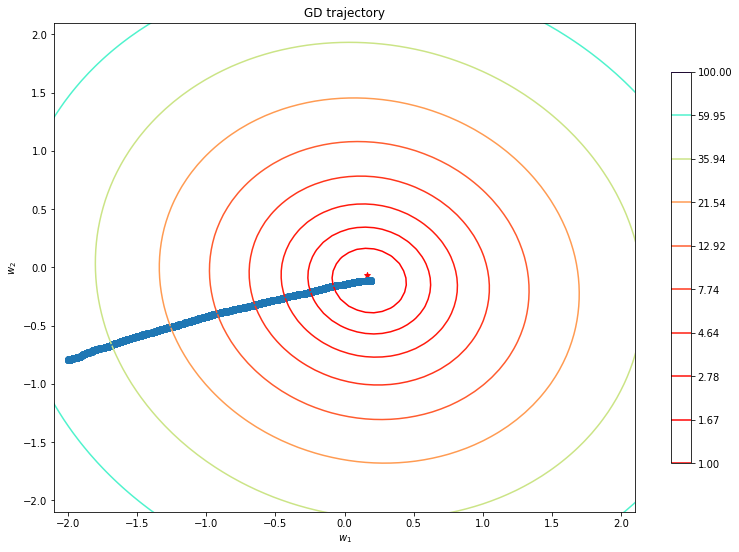

In [5]:
lr = LinearRegressionSGD(w0=w_0, alpha=1e-5)
lr.fit(X, y)
plot_gd(X, y, lr.w_history)

# Задание 2

In [6]:
class LinearRegressionGD(BaseEstimator):
    def __init__(self, epsilon=1e-3, max_steps=100, w0=None, alpha=1e-6):
        
        self.epsilon = epsilon # разница для нормы изменения весов 
        self.max_steps = max_steps # максимальное количество шагов
        self.w0 = w0 # начальные веса
        self.alpha = alpha # шаг обучения
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: # если нет начальной инициализации весов
            self.w0 = np.zeros(d)

        self.w = self.w0
        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)
            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    
    def predict(self, X):
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

In [8]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
lrgd_start_time = datetime.now()
lrgd = LinearRegressionGD()
lrgd.fit(X_train, y_train)
print('Время работы линейной регресии с полным градиентным спуском: ', datetime.now() - lrgd_start_time)
lrmbsgd_start_time = datetime.now()
lrmbsgd = LinearRegressionSGD(max_steps=100, alpha=1e-6)
lrmbsgd.fit(X_train, y_train)
print('Время работы линейной регресии с стохастическим градиентным спуском: ', datetime.now() - lrmbsgd_start_time)

Время работы линейной регресии с полным градиентным спуском:  0:00:00.218620
Время работы линейной регресии с стохастическим градиентным спуском:  0:00:00.131872


In [9]:
from sklearn.metrics import mean_squared_error

y_pred_lrgd = lrgd.predict(X_test)
y_pred_lrmbsgd = lrmbsgd.predict(X_test)
print('MSE Linear Regression with GD: ', mean_squared_error(y_test, y_pred_lrgd))
print('MSE Linear Regression with Mini-batch SGD: ', mean_squared_error(y_test, y_pred_lrmbsgd))

MSE Linear Regression with GD:  110.85318883110158
MSE Linear Regression with Mini-batch SGD:  106.41719681371161
